# Data Augmentation para o SESA Dataset usando ruído branco

A ideia é aumentar a quantidade de dados de treinamento usando ruído branco. Todos os áudios deverão ter ruído branco adicionado com SNRs de -10 dB até 30 dB, passo 5. Ou seja, cada áudio será replicado 9 vezes + o original. A pasta de treinamento passará de 480 para 4800 áudios.

O objetivo disso é verificar se é possível melhorar o desempenho do Beamforming, já que ele foi tão mal nos testes anteriores.

In [26]:
import librosa
import numpy as np
import math
import matplotlib.pyplot as plt
import os
from IPython.display import Audio

#### Abrindo um áudio aleatório para testar as funções que eu for implementando

In [5]:
caminhoSinal = '/home/dimi/Downloads/Datasets/SESA/SESA_Normalizado/train/casual_066.wav'
sinalOriginal, freqAmostragem = librosa.load(caminhoSinal, sr=None, mono=True)

#### Função para gerar ruído branco com energia definida

In [2]:
def gerarRuidoBranco(qtdAmostras, energia):
    
    media        = 0
    desvioPadrao = 1
    
    return np.random.normal(media, desvioPadrao, size=qtdAmostras) * energia**(1/2)

In [10]:
ruido = gerarRuidoBranco(len(sinalOriginal), 1)
Audio(data=ruido, rate=freqAmostragem)

Energia do sinal: 1.0000001
Energia do ruido: 1.0053906310594105


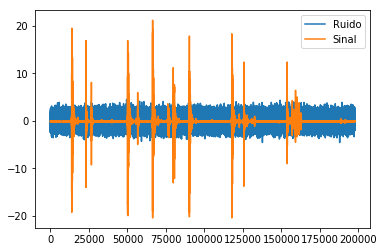

In [16]:
print("Energia do sinal:", np.var(sinalOriginal))
print("Energia do ruido:", np.var(ruido))

plt.plot(ruido, label="Ruido")
plt.plot(sinalOriginal, label="Sinal")
plt.legend()

#### Função para calcular qual deve ser a energia do ruído dada a SNR desejada

In [17]:
def calcularEnerigaRuidoDadoSNR(snrDesejada, energiaSinal):
    return energiaSinal/(10**(snrDesejada/10))

In [24]:
energiaRuido = calcularEnerigaRuidoDadoSNR(-5, 1)
energiaRuido

3.162277660168379

#### Função para calcular a SNR 

In [18]:
def calcularSNR(sinal, ruido):
    return 10 * math.log((np.var(sinal)/np.var(ruido)), 10)

In [25]:
ruido = gerarRuidoBranco(len(sinalOriginal), energiaRuido)
calcularSNR(sinalOriginal, ruido)

-5.006668993936265

## Finalmente...

In [44]:
# PASTAS DE ORIGEM E DESTINO DOS AUDIOS WAV
dirOrigem  = "/home/dimi/Downloads/Datasets/SESA/SESA_Normalizado/train/"
dirDestino = "/home/dimi/Downloads/Datasets/SESA/SESA_Normalizado/train_augmentation/"

# RANGE DE SNRS QUE EU QUERO USAR PARA FAZER O DATA AUGMENTATION
rangeSNRs = a = np.arange(-10, 31, 5)

# PARA CADA AUDIO NA PASTA DE ORIGEM
arrayArquivos = os.listdir(dirOrigem)
for i, arquivoAtual in enumerate(arrayArquivos):
    
    # ABRO O AUDIO ATUAL
    caminho = dirOrigem + arquivoAtual
    audioOriginalAtual, freqAmostragem = librosa.core.load(caminho, sr=None, mono=True)
    
    # COPIO O ORIGINAL PARA A PASTA DE DESTINO
    caminho = dirDestino + arquivoAtual
    librosa.output.write_wav(caminho, audioOriginalAtual, sr=freqAmostragem)
    
    # PARA CADA SNR DESEJADA
    for SNRAtual in rangeSNRs:
    
        # EU CRIO O RUIDO COM A ENERGIA CORRETA PARA ESSA SNR
        energiaRuido = calcularEnerigaRuidoDadoSNR(SNRAtual, 1)
        ruido        = gerarRuidoBranco(len(audioOriginalAtual), energiaRuido)
        
        # SOMO O SINAL DESEJADO COM O RUIDOSO
        somaSinais = audioOriginalAtual + ruido
        
        # SALVO NO DESTINO
        caminho = dirDestino + arquivoAtual[:-4] + "_SNR_" + str(SNRAtual) + "dB.wav"
        librosa.output.write_wav(caminho, somaSinais, sr=freqAmostragem)
        
    print("Progresso: " + str(100*((i+1)/len(arrayArquivos))) + "%")

Progresso: 0.20833333333333334%
Progresso: 0.4166666666666667%
Progresso: 0.625%
Progresso: 0.8333333333333334%
Progresso: 1.0416666666666665%
Progresso: 1.25%
Progresso: 1.4583333333333333%
Progresso: 1.6666666666666667%
Progresso: 1.875%
Progresso: 2.083333333333333%
Progresso: 2.2916666666666665%
Progresso: 2.5%
Progresso: 2.7083333333333335%
Progresso: 2.9166666666666665%
Progresso: 3.125%
Progresso: 3.3333333333333335%
Progresso: 3.5416666666666665%
Progresso: 3.75%
Progresso: 3.958333333333333%
Progresso: 4.166666666666666%
Progresso: 4.375%
Progresso: 4.583333333333333%
Progresso: 4.791666666666667%
Progresso: 5.0%
Progresso: 5.208333333333334%
Progresso: 5.416666666666667%
Progresso: 5.625%
Progresso: 5.833333333333333%
Progresso: 6.041666666666667%
Progresso: 6.25%
Progresso: 6.458333333333334%
Progresso: 6.666666666666667%
Progresso: 6.875000000000001%
Progresso: 7.083333333333333%
Progresso: 7.291666666666667%
Progresso: 7.5%
Progresso: 7.708333333333334%
Progresso: 7.916666

Progresso: 63.125%
Progresso: 63.33333333333333%
Progresso: 63.541666666666664%
Progresso: 63.74999999999999%
Progresso: 63.95833333333333%
Progresso: 64.16666666666667%
Progresso: 64.375%
Progresso: 64.58333333333334%
Progresso: 64.79166666666667%
Progresso: 65.0%
Progresso: 65.20833333333333%
Progresso: 65.41666666666667%
Progresso: 65.625%
Progresso: 65.83333333333333%
Progresso: 66.04166666666667%
Progresso: 66.25%
Progresso: 66.45833333333333%
Progresso: 66.66666666666666%
Progresso: 66.875%
Progresso: 67.08333333333333%
Progresso: 67.29166666666667%
Progresso: 67.5%
Progresso: 67.70833333333334%
Progresso: 67.91666666666667%
Progresso: 68.125%
Progresso: 68.33333333333333%
Progresso: 68.54166666666667%
Progresso: 68.75%
Progresso: 68.95833333333333%
Progresso: 69.16666666666667%
Progresso: 69.375%
Progresso: 69.58333333333333%
Progresso: 69.79166666666666%
Progresso: 70.0%
Progresso: 70.20833333333333%
Progresso: 70.41666666666667%
Progresso: 70.625%
Progresso: 70.83333333333334%